In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
from cartopy import crs as ccrs
from cartopy.io import shapereader
from cartopy import feature as cfeature

import pandas as pd
import numpy as np
import logging

matplotlib.rc("lines", linewidth=2)
matplotlib.rc("figure", figsize=(16,6))

logger = logging.getLogger()
logger.setLevel(logging.INFO)

ModuleNotFoundError: No module named 'cartopy'

# ERCOT wind power production

ERCOT publishes complete power flows for all nodes with in the [60-Day SCED Disclosure Report](http://www.ercot.com/mktinfo/reports), published with a 60 day lag from operating date. 

- [ercot_wind_power.pkl](http://storage.googleapis.com/gridmatic/roscoe/ercot_wind_power.pkl) - 3 years worth of data (2015-01-01 to 2018-12-31) for 164 wind farms. Note that wind farms that were not operational on 2015-01-01 will have partial data during this period, denoted as NaN in the dataset. The data is in 15-minute intervals (the settlement granularity for the real-time market).

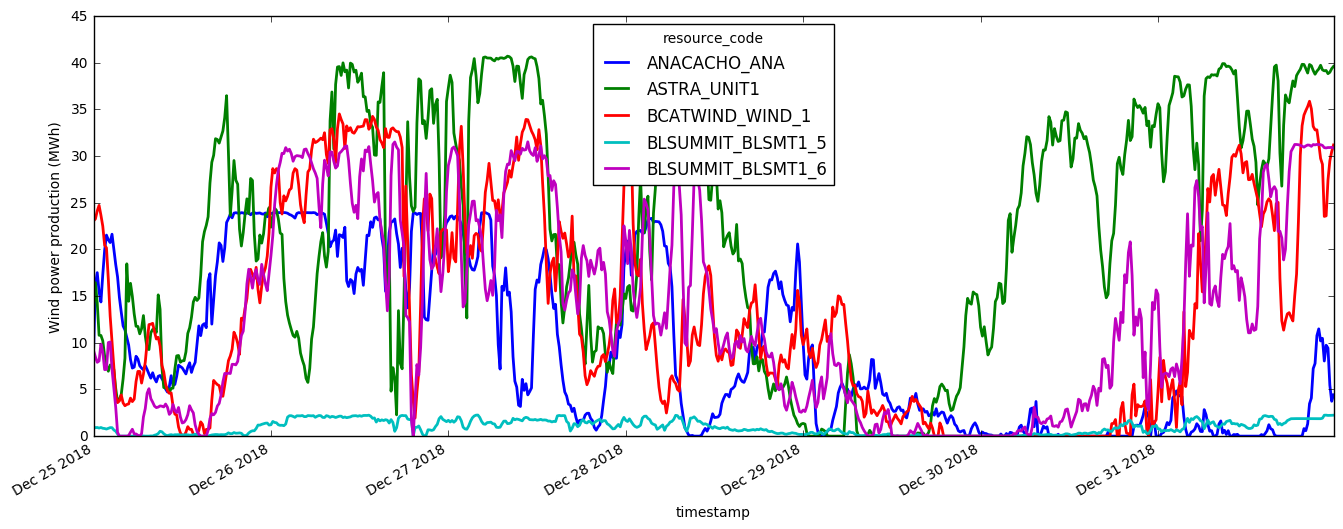

In [10]:
ercot_wind_power = pd.read_pickle("ercot_wind_power.pkl")
ercot_wind_power.ix[-168*4:,:5].plot()
plt.ylabel("Wind power production (MWh)")

# NAM numerical weather prediction model

NOAA publishes several numerical weather prediction (NWP) models on a daily basis. Here we collect data from the [North American Mesocale (NAM) model](https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/north-american-mesoscale-forecast-system-nam) for a 140x140 grid that covers Texas and surrounding area.

- [nam_timestamps.pkl](http://storage.googleapis.com/gridmatic/roscoe/nam_timestamps.pkl) - Timestamps representing prediction time
- [nam_locations.npy](http://storage.googleapis.com/gridmatic/roscoe/nam_locations.npy) - Latitudes and longitudes for predictions
- [nam_data-00000-of-00032.npy](http://storage.googleapis.com/gridmatic/roscoe/nam_data-00000-of-00032.npy) (00001, 00002, ...) - Sharded data, $N \times 140 \times 140 \times 9$ variables from the NAM model

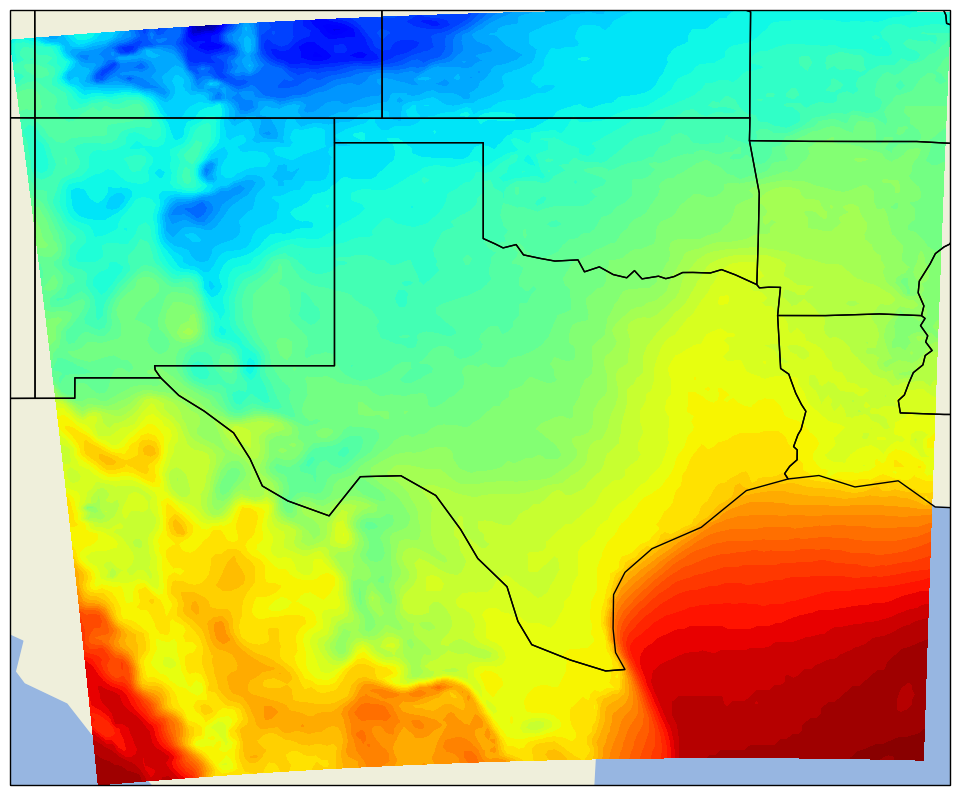

In [37]:
nam_locations = np.load("nam_locations.npy")
nam_data = np.load("nam_data-00000-of-00032.npy")
NAM_FIELDS = [
    "accum_precip",
    "dewpoint_temperature_2m",
    "downward_short_wave_flux",
    "relative_humidity_2m",
    "sea_level_pressure",
    "temperature_2m",
    "total_cloud_cover",
    "u_wind_80m",
    "v_wind_80m",
]

latitudes = nam_locations[:,:,0]
longitudes = nam_locations[:,:,1]

plt.figure(figsize=(30,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([np.min(longitudes),
               np.max(longitudes),
               np.min(latitudes),
               np.max(latitudes)], ccrs.Geodetic())

states = cfeature.NaturalEarthFeature(
    category="cultural",
    name="admin_1_states_provinces_lakes_shp",
    scale="110m",
    facecolor="none")

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(states)

plt.contourf(longitudes, latitudes, nam_data[0,:,:,5], 60, transform=ccrs.PlateCarree()) 